# Background
One of the most fundamental questions in biology which is yet unanswered is why does almost every organism use prettty much exclusively L-amino acids and D-sugars. Ribose is one of the most important of these D-sugars as it comprises the backbone of RNA, and its deoxy form for DNA. This project will be using molecular dynamics to try and discover preferential interactions between ribose and its precursors with nucleobases which could explain why only the right handed sugars are used in DNA and RNA. 
## What do we Mean by D and L?
Before we can delve into the world of thermodyanmics and molecular dynamics, we should first define the concept of chirality so we can get some kind of justifcation for why this matters. Two objects are said to be chrial when they cannot be superimposed on eachother with just rotation. Take the classic example of your hands. If you put both of your palms up and overlay your hands on top of eachother, you palms are facing the same direction, but now your thumbs are facing in opposite directions. If you flip on hand over, your thumbs are facing the same direction, but now your palms are facing different directions. Because there is no way to rotate your hands which cause them to be superimpoable, your hands are said to be chiral. This concept applies to any 3D object, including molecules. 
<br><br>
For this project, just how handedness is determined in molecules is not important, however chiral molecules are placed into two categories: "right-handed" or "D", or "left-handed" or "L". 

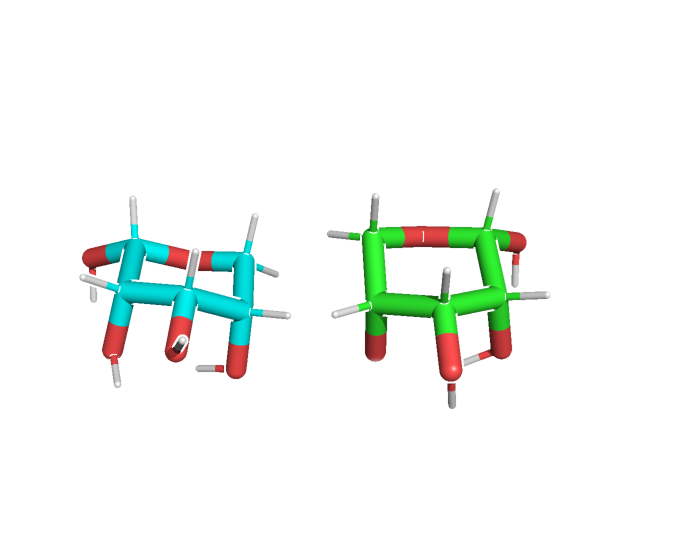 


<br><br>
Above we have D-Ribose on the right and L-ribose on the left. As you can see. The two molecules are facing the same way (the oxygens in the ring are both facing up, and all the hydroxyls are facing down), however the hydroxyls closest to the oxygen heteroatom are facing in opposite directions. In this case, this hydroxyl is analgous to our thumbs in the hand example. If we were to rotate one of the riboses so that the hydroxyls were facing the same direction, the three hydroxyls which were facing down, would now be facing up (just like our palms when we rotate our thumbs to line up), making these two molecules chiral. Two molecules with the exact same chemcial strucuture with the exception of being chiral are referred to as "enantiomers", so we can say that D and L Ribose are enantiomers. 

## Origin of Ribose
There are several possible explanations for the prebiotic origins of ribose, and more generally most simple sugars, ranging from various organic chemsitry mechanisms to coming from space. So far this project has been operating under the assumption that the formose reaction is responsible for creating simple sugars. The formose reaction is a simple polymerization of formaldehyde in the presence of a base and a divalent cation such as Calcium and Magnesium. This reaction has been shown to abiotically produce dozens of kinds of simple sugars including tetroses, pentoses, hexoses, and even bigger sugars. 
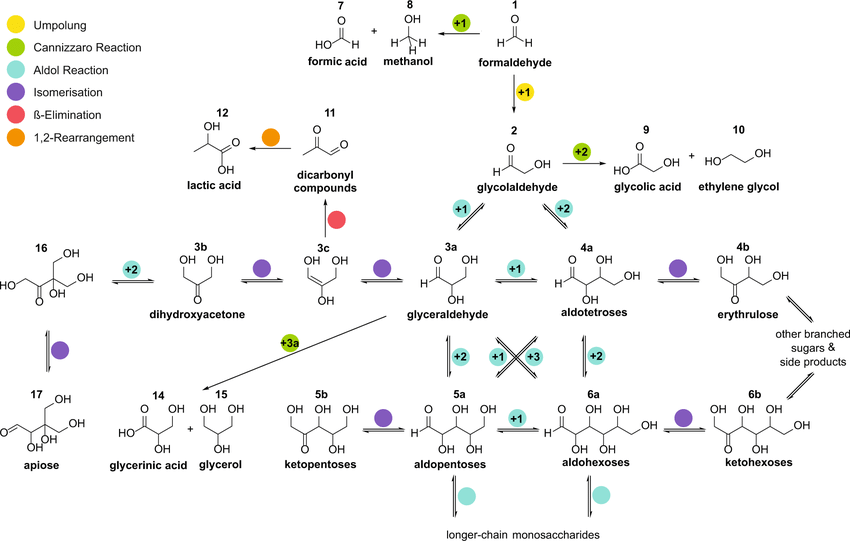
<br><br>
